In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
from collections import Counter
import datetime
import json
import wordcloud

In [5]:
df = pd.read_csv("D://DATA SCIENCE//youtube trending analysis//archive//USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [29]:
df.shape

(40949, 18)

In [6]:
df['description']=df['description'].fillna("")

In [7]:
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [9]:
def contains_cap(column):
    for i in column.split():
        if(i.isupper()):
            return True
    return False

In [10]:
df['contains_capital']=df['title'].apply(contains_cap)

In [11]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capital
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True


In [12]:
value_count=df['contains_capital'].value_counts().to_dict()
value_count

{False: 22949, True: 18000}

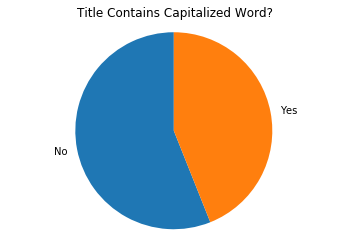

In [13]:
fig,ax = plt.subplots()
_ = ax.pie([value_count[False], value_count[True]], labels=['No', 'Yes'],startangle=90)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [14]:
df['title_length']=df['title'].apply(len)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capital,title_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,62
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24


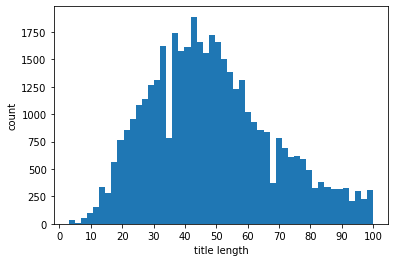

In [15]:
fig,ax=plt.subplots()
_= sns.distplot(df['title_length'],kde=False,hist_kws={'alpha': 1},rug=False)
_=ax.set(xlabel="title length",ylabel='count',xticks=(range(0,110,10)))

In [16]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns)]

In [17]:
h_labels

['Category Id',
 'Views',
 'Likes',
 'Dislikes',
 'Comment Count',
 'Comments Disabled',
 'Ratings Disabled',
 'Video Error Or Removed',
 'Contains Capital',
 'Title Length']

In [18]:
labels=df.select_dtypes(include=['number','bool']).columns.tolist()
labels

['category_id',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'contains_capital',
 'title_length']

In [19]:
new_labels=[x.title() for x in labels]
new_labels

['Category_Id',
 'Views',
 'Likes',
 'Dislikes',
 'Comment_Count',
 'Comments_Disabled',
 'Ratings_Disabled',
 'Video_Error_Or_Removed',
 'Contains_Capital',
 'Title_Length']

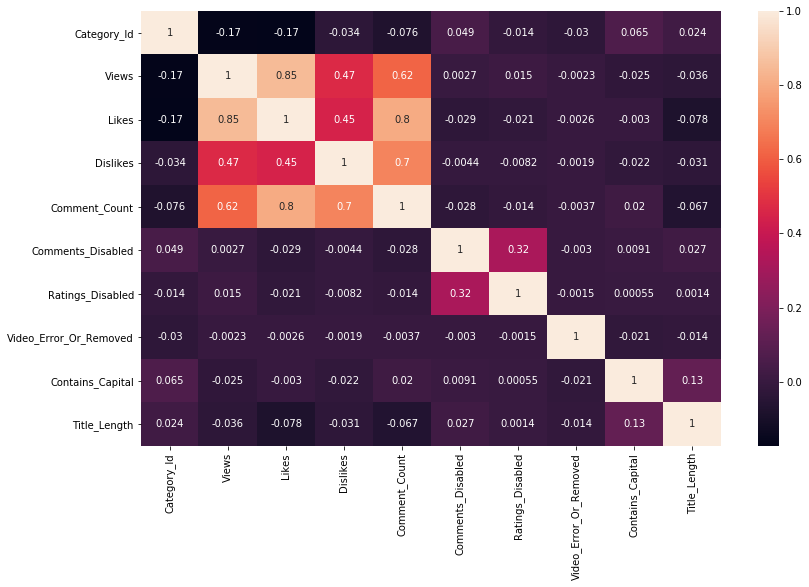

In [20]:
fig,ax=plt.subplots(figsize=(13,8))
_=sns.heatmap(df.corr(),annot=True,xticklabels=new_labels, yticklabels=new_labels)

In [21]:
title_words=df['title'].apply(lambda x:x.split()).tolist()
title_words

[['WE', 'WANT', 'TO', 'TALK', 'ABOUT', 'OUR', 'MARRIAGE'],
 ['The',
  'Trump',
  'Presidency:',
  'Last',
  'Week',
  'Tonight',
  'with',
  'John',
  'Oliver',
  '(HBO)'],
 ['Racist',
  'Superman',
  '|',
  'Rudy',
  'Mancuso,',
  'King',
  'Bach',
  '&',
  'Lele',
  'Pons'],
 ['Nickelback', 'Lyrics:', 'Real', 'or', 'Fake?'],
 ['I', 'Dare', 'You:', 'GOING', 'BALD!?'],
 ['2', 'Weeks', 'with', 'iPhone', 'X'],
 ['Roy', 'Moore', '&', 'Jeff', 'Sessions', 'Cold', 'Open', '-', 'SNL'],
 ['5', 'Ice', 'Cream', 'Gadgets', 'put', 'to', 'the', 'Test'],
 ['The',
  'Greatest',
  'Showman',
  '|',
  'Official',
  'Trailer',
  '2',
  '[HD]',
  '|',
  '20th',
  'Century',
  'FOX'],
 ['Why',
  'the',
  'rise',
  'of',
  'the',
  'robots',
  'won’t',
  'mean',
  'the',
  'end',
  'of',
  'work'],
 ['Dion',
  "Lewis'",
  '103-Yd',
  'Kick',
  'Return',
  'TD',
  'vs.',
  'Denver!',
  '|',
  "Can't-Miss",
  'Play',
  '|',
  'NFL',
  'Wk',
  '10',
  'Highlights'],
 ['(SPOILERS)',
  "'Shiva",
  'Saves',
  't

In [22]:
new_words=[y for x in title_words for y in x]
new_words

['WE',
 'WANT',
 'TO',
 'TALK',
 'ABOUT',
 'OUR',
 'MARRIAGE',
 'The',
 'Trump',
 'Presidency:',
 'Last',
 'Week',
 'Tonight',
 'with',
 'John',
 'Oliver',
 '(HBO)',
 'Racist',
 'Superman',
 '|',
 'Rudy',
 'Mancuso,',
 'King',
 'Bach',
 '&',
 'Lele',
 'Pons',
 'Nickelback',
 'Lyrics:',
 'Real',
 'or',
 'Fake?',
 'I',
 'Dare',
 'You:',
 'GOING',
 'BALD!?',
 '2',
 'Weeks',
 'with',
 'iPhone',
 'X',
 'Roy',
 'Moore',
 '&',
 'Jeff',
 'Sessions',
 'Cold',
 'Open',
 '-',
 'SNL',
 '5',
 'Ice',
 'Cream',
 'Gadgets',
 'put',
 'to',
 'the',
 'Test',
 'The',
 'Greatest',
 'Showman',
 '|',
 'Official',
 'Trailer',
 '2',
 '[HD]',
 '|',
 '20th',
 'Century',
 'FOX',
 'Why',
 'the',
 'rise',
 'of',
 'the',
 'robots',
 'won’t',
 'mean',
 'the',
 'end',
 'of',
 'work',
 'Dion',
 "Lewis'",
 '103-Yd',
 'Kick',
 'Return',
 'TD',
 'vs.',
 'Denver!',
 '|',
 "Can't-Miss",
 'Play',
 '|',
 'NFL',
 'Wk',
 '10',
 'Highlights',
 '(SPOILERS)',
 "'Shiva",
 'Saves',
 'the',
 "Day'",
 'Talked',
 'About',
 'Scene',
 'E

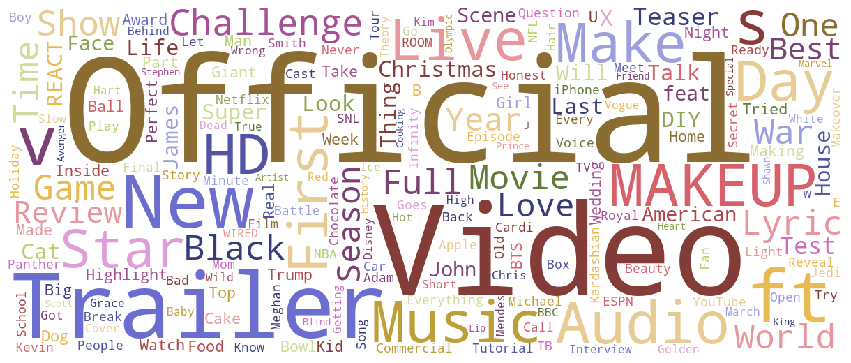

In [26]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(new_words))
plt.figure(figsize=(15,10))
plt.imshow(wc)
_ = plt.axis("off")